In [1]:
import tensorflow as tf
import keras

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from extracao_dados import get_images_array, ler_imagens

In [71]:
le.transform(list(set(true_labels)))[17]

27

In [72]:
le.inverse_transform(le.transform(list(set(true_labels))))[17]

'Z'

11477 images loaded


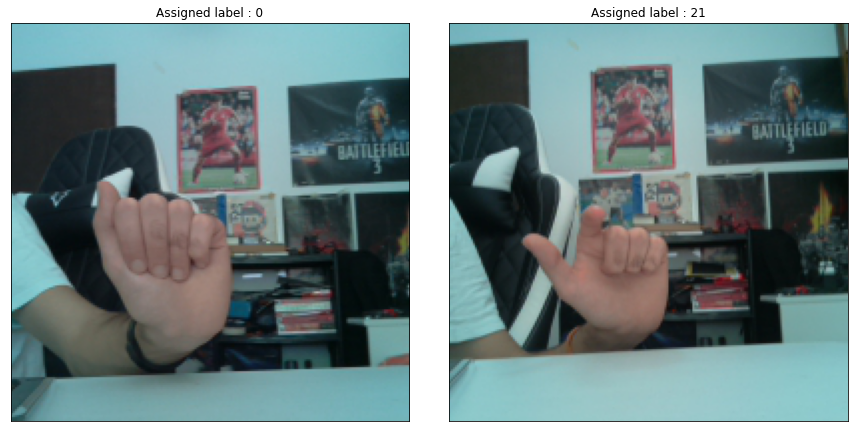

In [2]:
images, true_labels = get_images_array()

images = images.astype(np.float32)

le = preprocessing.LabelEncoder()
le.fit(true_labels)
labels = le.transform(true_labels)

labels = np.array(labels).astype(np.int32)

def display_rand_images(images, labels):
    plt.figure(1 , figsize = (15 , 10))
    n = 0 
    for i in range(2):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(1, 2, n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.1)
        plt.imshow(images[r[0]])
        
        plt.title('Assigned label : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()

display_rand_images(images, labels)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.2, random_state=666)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size = 0.5, random_state=666)

print(len(x_train), 'images for training')
print(len(x_test), 'images for test')
print(len(x_val), 'images for validation')

9181 images for training
1148 images for test
1148 images for validation


In [4]:
y_train = np.array(y_train)

In [5]:
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

model = keras.models.Sequential([
    Conv2D(64, 3, activation='relu', padding='same', input_shape=[200, 200, 3]),
    MaxPooling2D(2),
    Conv2D(128, 3, activation='relu', padding='same'),
    Conv2D(128, 3, activation='relu', padding='same'),
    MaxPooling2D(2),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(len(set(labels)), activation='softmax')
])

In [6]:
from keras.optimizers import SGD, RMSprop

optimizer = RMSprop(lr = 0.001)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer, metrics = ['accuracy'])

In [7]:
history = model.fit(x_train, y_train, 
              epochs=5, 
              batch_size = 8,
              steps_per_epoch=len(x_train)/8,
              validation_data=(x_val, y_val),
              validation_steps = len(x_val)/8,
              verbose=1)

Epoch 1/5
1148/1147 [==============================] - 79s 69ms/step - loss: 0.9070 - accuracy: 0.7731 - val_loss: 0.0636 - val_accuracy: 0.9852
Epoch 2/5
1148/1147 [==============================] - 79s 69ms/step - loss: 0.0965 - accuracy: 0.9807 - val_loss: 0.0945 - val_accuracy: 0.9808
Epoch 3/5
1148/1147 [==============================] - 85s 74ms/step - loss: 0.0943 - accuracy: 0.9895 - val_loss: 0.2252 - val_accuracy: 0.9817
Epoch 4/5
1148/1147 [==============================] - 85s 74ms/step - loss: 0.1138 - accuracy: 0.9915 - val_loss: 0.0697 - val_accuracy: 0.9922
Epoch 5/5
1148/1147 [==============================] - 84s 73ms/step - loss: 0.1047 - accuracy: 0.9929 - val_loss: 0.1720 - val_accuracy: 0.9765


In [8]:
loss, accuracy = model.evaluate(x_test, y_test)

print("Loss = ",loss,"\nAccuracy = ",accuracy)

36/36 [==============================] - 3s 72ms/step - loss: 0.1818 - accuracy: 0.9782
Loss =  0.1817779242992401 
Accuracy =  0.9782230257987976


In [9]:
x = set(true_labels)

In [112]:
filepath = ['/home/gustavo/Downloads/dataset_CEE/archive/asl_alphabet_test/asl_alphabet_test/V_test.jpg']

img_ex = ler_imagens(filepath, 200, 200, 3)

pred = model.predict(img_ex)
letter = le.inverse_transform([np.argmax(pred, axis=-1)[0]])[0]
proba = pred[0][np.argmax(pred, axis=-1)[0]] * 100
print("Predicted:", letter, "with:", proba, "%")

Predicted: V with: 100.0 %
